<a href="https://colab.research.google.com/github/tonu1990/AI_ML_Learning/blob/main/2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CNN Intution**

* Similar to how a child learns to recognise objects, we need to show an algorithm millions of pictures before it is be able to generalize the input and make predictions for images it has never seen before.

* Computers ‘see’ in a different way than we do. Their world consists of only numbers. Every image can be represented as 2-dimensional arrays of numbers, known as pixels.

**Understanding an Image in computer scenario **

* A digital image consists of three dimensions — commonly referred to as channels in CNNs — representing the Red, Green, and Blue (RGB) color components. These three channels combine to produce the colors we perceive in an image.
* For example, consider an 8×8 color image. Computers store it as three matrices of pixel values, one for each color channel. Thus, its representation becomes 8×8×3 (height × width × channels).

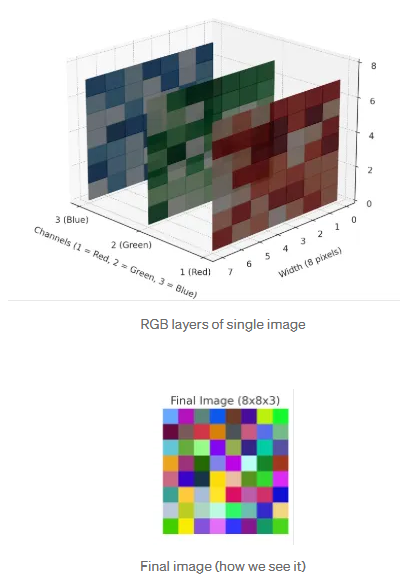

* (255, 0, 0) → Full Red , (0, 255, 0) → Full Green, (0, 0, 255) → Full Blue ,(255, 255, 255) → White (all channels at full intensity)

**The Need for Locality in Image Processing**

* If we were to process this image using a standard FNN, the first input layer would require 192 neurons (since 8 × 8 × 3 = 192).Consider a more typical image size — 1280 × 720 pixels (HD resolution). The input layer would now require 2,764,800 neurons, each with its own weights and biases (parameters).
* Since FNNs typically have multiple hidden layers with multiple neurons for better abstraction and non-linearity, the number of parameters would explode into billions — making training and computation highly impractical and inefficient.
* also  feeding raw pixel values into an FNN does not effectively capture useful information. As human beings, we interpret images by understanding the relationships between neighboring pixels — not by analyzing each pixel in isolation.
* A single pixel on its own tells us nothing. However, when grouped with surrounding pixels, a meaningful pattern emerges.
* Thus, if we want our neural network to learn effectively, we need a way to process images in localized groups of pixels, just as our brains do

**Convolution process**
* Picture this: You meet someone new. Even though all humans share the same basic facial components — eyes, nose, hair, etc. — your brain effortlessly picks up on unique features. Maybe they have striking blue eyes, an impressive beard, or the kind of hair
* Your **brain filters the visual data and highlights the most distinctive traits**.
* In the same way CNNs don’t just stare at every single pixel individually like an FNN would. Instead, **CNNs apply filters to emphasize important visual features** — edges, textures, patterns — so they can recognize and remember what makes an image unique.
* CNNs learn in a **hierarchical manner** - **Early layers** detect simple, low-level features like edges and corners, **Mid-level layers** start recognizing textures, shapes, and patterns, **Deeper layers** extract high-level, abstract features — like eyes, noses, or even entire object structures.
* This hierarchical feature extraction is what makes CNNs so powerful.
* Instead of manually designing feature detectors, **CNNs learn the best features at each level**, progressively building a rich understanding of an image. This is why deep networks outperform traditional handcrafted feature extraction techniques.
* Rememebr in CNN the terms **features, filters or kernels** are interchangeably used.

**Mathematical Overview of Convolution**

* “In mathematics convolution is a mathematical operation on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other.”
* It is a process where we take a **small matrix of numbers** (called kernel or filter), we **pass it over our image** and **transform it** based on the values from filter.
* After placing our filter over a selected pixel, we take **each value from kernel and multiply them in pairs** with corresponding values from the image. Finally we sum up everything and put the result in the right place in the **output feature map**.


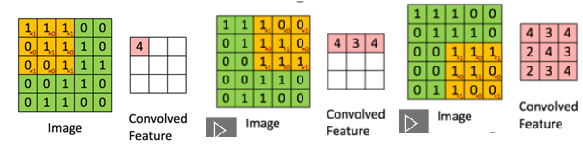

* The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image.
* After convolution of kernel/filter/feature detector over the image we get a feature map.


**Applying Filters - Matrix Dot Product**

* Rememer in CNN each cell value of filter matrix is also **weight** and those values gets **updated during backpropogation** each time we iterate through it.

* The **dot product** (or element-wise multiplication followed by summation) is a fundamental operation in convolution.

* **When applying a filter to an image**, we:
  *  Place the filter (kernel) on a section of the image matrix.
  *  Multiply each element of the filter by the corresponding pixel value.
  *  Sum up all the values.
  *  Store the result in the output feature map.


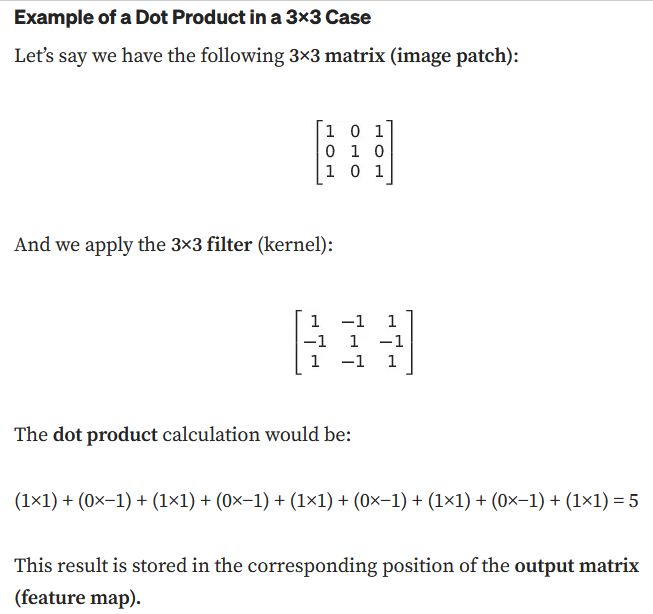

* There are 2 more concepts that we need to understand before delving into actual calculations: **Stride and Zero-padding**
* **Stride** defines how much the filter moves after each step.
    * Stride = 1 → The filter moves one pixel at a time (most common).
    * Stride = 2 → The filter moves two pixels at a time, reducing output size.

* A higher stride reduces the feature map size, making the network more computationally efficient but potentially losing some detail.
* **Zero-padding** adds extra rows and columns of zeros around the original image to control the size of the output feature map.
    * “Valid” convolution: No padding → Feature map gets smaller.
    * “Same” convolution: Padding is applied so the output feature map size remains the same as the input size.


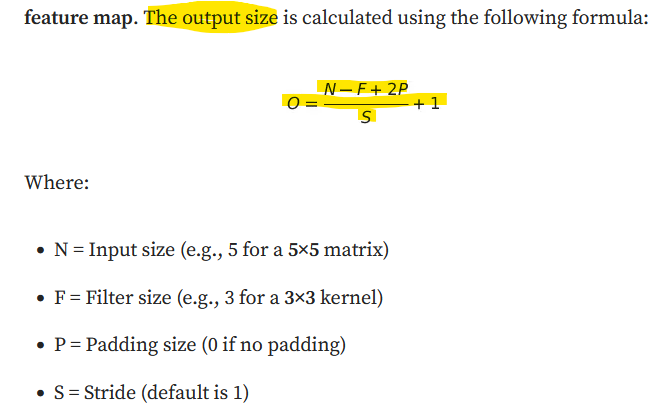

**Applying Convolution in 3 dimensional image**
* Consider an image of size 28×28×3 (height, width, channels).
* **Kernel Dimensions**
  * A convolutional filter for a color image must span all channels
  * Example: A kernel of size 5×5×3 (spatial dimensions 5×5, depth equal to 3 channels).
  * It learns separate weights for each channel.
* During the convolution process, the filter slides over the image and, at each position, performs an element-wise multiplication between the 5×5×3 kernel and the corresponding 5×5×3 patch of the image. The products are then summed up to produce a single output value at that spatial location.
* As we slide our filters we’ll get a **2-D output for each filter** and we’ll stack them together as a result.
* Output Feature Map Dimension:
  * No padding , stride 1 : Output Dimension=Input Dimension−Kernel Size+1
  * Output Height: 28−5+1=2428−5+1=24
  * Output Width: 28−5+1=2428−5+1=24
  * **Output Feature Map Depth** - Since you are using a single kernel (or filter), the depth of the output feature map is 1
  * This means after applying the 5×5×3 kernel to the 28×28×3 image, you get a feature map that is 24 pixels in height, 24 pixels in width, and 1 channel deep.

**Layers Used to Build onvolution Neural Networks**

Let’s take an example by running a covnets on an image of dimension 32 x 32 x 3.

* **Input Layers**: It’s the layer in which we give input to our model. In CNN, Generally, the input will be an image or a sequence of images. This layer holds the raw input of the image with width 32, height 32, and depth 3.
* **Convolutional Layers**: This is the layer, which is used to extract the feature from the input dataset. It applies a set of learnable filters known as the kernels to the input images. The filters/kernels are smaller matrices usually 2×2, 3×3, or 5×5 shape. it slides over the input image data and computes the dot product between kernel weight and the corresponding input image patch. The output of this layer is referred as feature maps.
  * Suppose we use a **total of 12 filters** for this layer we’ll get an output volume of dimension **32 x 32 x 12**.

* **Activation Layer**:
  
  * By adding an activation function to the output of the preceding layer, activation layers add **nonlinearity to the network**.
  * it will apply an element-wise activation function to the output of the convolution layer.
  * Some common activation functions are **RELU: max(0, x),  Tanh, Leaky RELU**, etc. The volume remains unchanged hence output volume will have dimensions **32 x 32 x 12**.
  * Without activation functions, CNNs would only perform linear operations- it's a weighted sum (multiplication and addition)
  * If we stack multiple convolutional layers without activation functions, the entire network can be collapsed into a single linear operation. Mathematically, composing multiple linear functions still results in a linear function.
  * Human brain Analogy: If the child’s brain could only use linear rules to recognize faces, it would be limited to very basic patterns. For example:
      * The child might learn: "If the eyes are above the nose, and the nose is above the mouth, it’s a face."
      * This is a linear rule because it’s a straightforward, rigid combination of features.
      * This approach fails when the face is tilted, the lighting changes, or the person has a different expression. The child would struggle to generalize because the rules are too simplistic and inflexible.
      * In reality, the child’s brain uses non-linear rules to recognize faces.
      * The child learns to recognize a face even if it’s rotated, partially obscured, or illuminated differently.
      * The brain combines multiple features (eyes, nose, mouth, etc.) in a non-linear way, allowing it to handle variations and complexities.
      * How Non-Linearity Helps: The child can recognize a face even if the eyes are slightly squinted (non-linear variation in shape),  recognize a face in low light or with shadows (non-linear variation in lighting), recognize a face even if parts of it are obscured (non-linear handling of missing information).
      * ReLU is widely used in hidden layers because it allows the network to learn complex patterns efficiently while maintaining computational simplicity.
  * Pooling layer: This layer is periodically inserted in the covnets and its main function is to **reduce the size of volume which makes the computation fast reduces memory and also prevents overfitting**.
  * Two common types of pooling layers are max pooling and average pooling. If we use a max pool with 2 x 2 filters and stride 2, the resultant volume will be of dimension **16x16x12**.

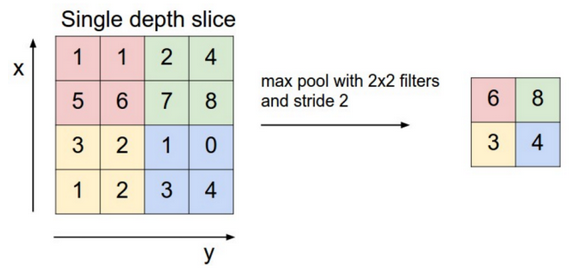

* **Flattening:** The resulting feature maps are flattened into a one-dimensional vector after the convolution and pooling layers so they can be passed into a completely linked layer for categorization or regression.



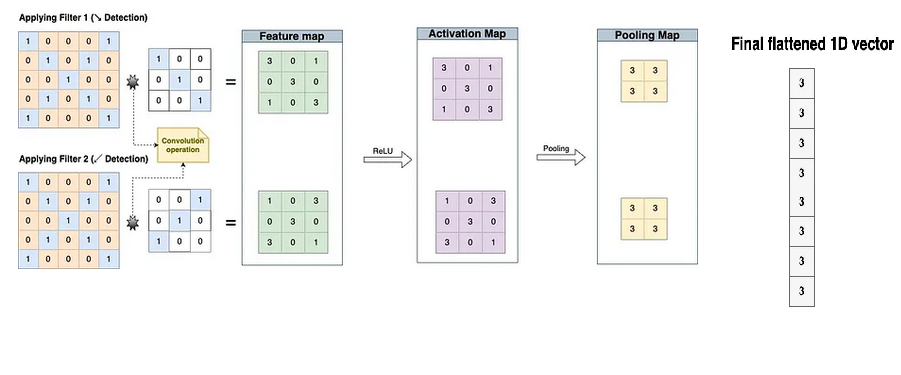

* **Fully Connected Layers:** It takes the input from the previous layer and computes the final classification or regression task.

* **Output Layer:** The output from the fully connected layers is then fed into a logistic function for classification tasks like sigmoid or softmax which converts the output of each class into the probability score of each class.

CNNs are often used for multi-class classification, meaning they must decide among multiple possible categories rather than just detecting a single object. This is where the **Softmax layer** comes in.
*     The Softmax function converts raw output scores (logits) into probabilities, ensuring that all class scores sum to 1.
* This allows the network to assign confidence scores to different classes, making it easy to interpret predictions.
* For example, if our model is trained to recognize digits (0–9), the final layer will output 10 probabilities, one for each digit. The class with the highest probability is chosen as the final prediction.


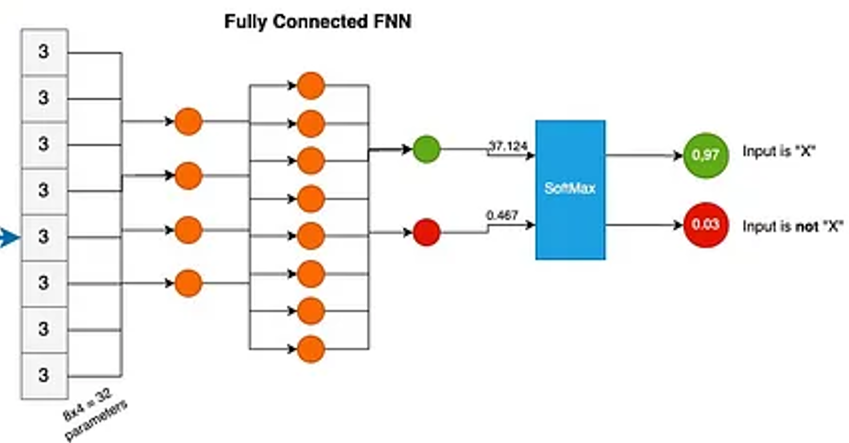

Few points to remember about what we covered till now:
* What we’ve covered so far is just **forward propagation**.
* In practice, during training, both the filter weights and the neural network weights are updated through **backpropagation**.
* CNN architecture is not strictly limited to the steps we’ve discussed. There can be multiple convolutional layers, activations, or pooling layers, and their order can vary.
* The best architecture ultimately depends on experimentation and iterative improvements.
* It is better to include or learn about **Loss** also, as in actual CNN traning Loss will be calculated and backpropagation happens .


 **Loss layer - as Last layer of CNN**